In [1]:
import sys
sys.path.append("..")
import torch
from diffusers import UNet2DModel, DDIMScheduler, DDPMPipeline
import matplotlib.pyplot as plt
from fixer.models import *
torch.cuda.set_device(0)

/home/antonxue/lib/miniconda3/envs/arpro/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
model_path = "../_dump/fixer_diffusion_mvtec_transistor_best.pt"
model_dict = torch.load(model_path)['model_state_dict']
mydiff = MyDiffusionModel()
mydiff.load_state_dict(model_dict)
mydiff.eval().cuda();

In [3]:
xgens = mydiff(batch_size=2, progress_bar=True, num_inference_steps=1000)

100%|██████████| 1000/1000 [00:32<00:00, 30.81it/s]


In [4]:
xgens.shape

torch.Size([2, 3, 256, 256])

<Figure size 640x480 with 0 Axes>

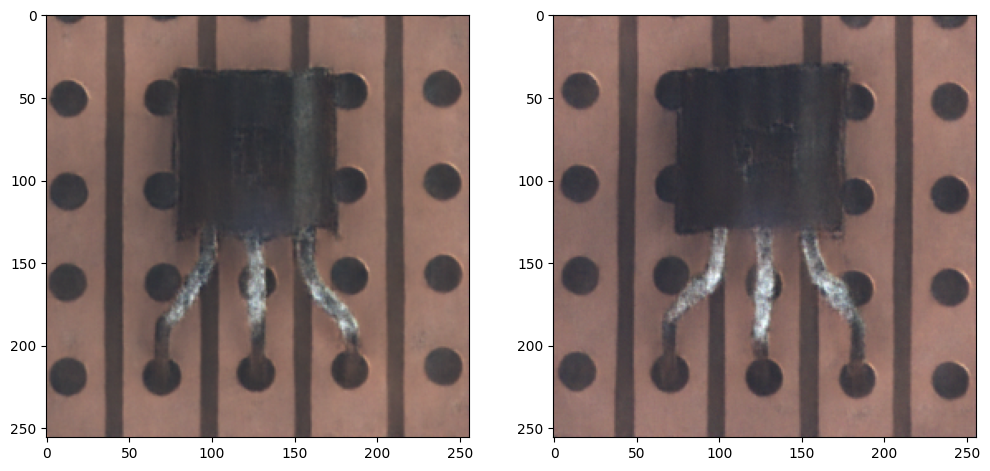

In [5]:
plt.clf()
fig, ax = plt.subplots(1, 2, figsize=(12, 8))
for i in range(2):
    xi = 0.5*xgens[i].cpu().detach()+0.5
    ax[i].imshow(xi.numpy().transpose(1,2,0))

In [6]:
mydiff = MyDiffusionModel()
mydiff.eval().cuda();

In [7]:
unet = UNet2DModel(sample_size=256)
scheduler = DDIMScheduler()
pipeline = DDPMPipeline(unet, scheduler)

In [8]:
t = torch.randint(0, mydiff.num_timesteps, (1,))

In [9]:
x_noised = mydiff.add_noise(x, eps, t)

NameError: name 'x' is not defined

In [ ]:
(x_noised[0] - x_noised[1]).abs().sum()

tensor(0.)

In [ ]:
# out = mydiff(x.cuda(), t.cuda(), num_inference_steps=10, enable_grad=False, progress_bar=True)

In [ ]:
scheduler.num_inference_steps